In [6]:
import os
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
def load_emnist_data(base_path):
    #listy do przechowywania danych i etykiet
    data = []
    labels = []

    #Ścieżki do folderów Train i Validation
    train_path = os.path.join(base_path, 'Train')
    validation_path = os.path.join(base_path, 'Validation')

    # Funkcja wczytująca dane z folderu
    def load_data_from_folder(folder_path, label):
        images = []
        for filename in os.listdir(folder_path):
            if filename.endswith(('.jpg', '.png')):
                img_path = os.path.join(folder_path, filename)
                img = io.imread(img_path, as_gray=True)  #Odcień szarości
                img = transform.resize(img, (28, 28))  #Przeskalowanie na 28x28px
                images.append(img)
                labels.append(label)
        return images

    #Wczytywanie danych treningowych
    for label in os.listdir(train_path):
        label_path = os.path.join(train_path, label)
        if os.path.isdir(label_path):
            label_value = ord(label)  #ASCII
            data += load_data_from_folder(label_path, label_value)

    #Wczytywanie danych walidacyjnych
    for label in os.listdir(validation_path):
        label_path = os.path.join(validation_path, label)
        if os.path.isdir(label_path):
            label_value = ord(label)  #ASCII
            data += load_data_from_folder(label_path, label_value)

    #Listy na num array
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

In [3]:
#Folder za danymi
base_path = 'C:/Users/Adam/Desktop/pulpit/archive/dataset'

In [4]:
#Wywołanmie wczytywania
data, labels = load_emnist_data(base_path)

Rozmiar danych: (856014, 28, 28)
Rozmiar etykiet: (856014,)
Numer ASCII 35- Etykieta #
Numer ASCII 36- Etykieta $
Numer ASCII 38- Etykieta &
Numer ASCII 48- Etykieta 0
Numer ASCII 49- Etykieta 1
Numer ASCII 50- Etykieta 2
Numer ASCII 51- Etykieta 3
Numer ASCII 52- Etykieta 4
Numer ASCII 53- Etykieta 5
Numer ASCII 54- Etykieta 6
Numer ASCII 55- Etykieta 7
Numer ASCII 56- Etykieta 8
Numer ASCII 57- Etykieta 9
Numer ASCII 64- Etykieta @
Numer ASCII 65- Etykieta A
Numer ASCII 66- Etykieta B
Numer ASCII 67- Etykieta C
Numer ASCII 68- Etykieta D
Numer ASCII 69- Etykieta E
Numer ASCII 70- Etykieta F
Numer ASCII 71- Etykieta G
Numer ASCII 72- Etykieta H
Numer ASCII 73- Etykieta I
Numer ASCII 74- Etykieta J
Numer ASCII 75- Etykieta K
Numer ASCII 76- Etykieta L
Numer ASCII 77- Etykieta M
Numer ASCII 78- Etykieta N
Numer ASCII 80- Etykieta P
Numer ASCII 81- Etykieta Q
Numer ASCII 82- Etykieta R
Numer ASCII 83- Etykieta S
Numer ASCII 84- Etykieta T
Numer ASCII 85- Etykieta U
Numer ASCII 86- Etykie

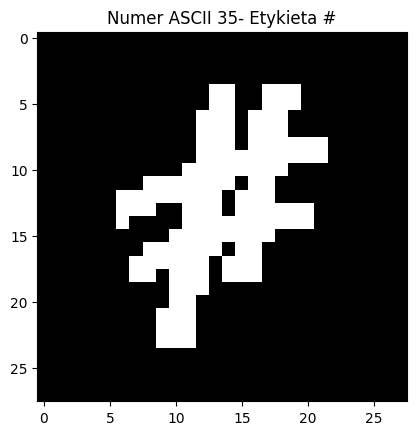

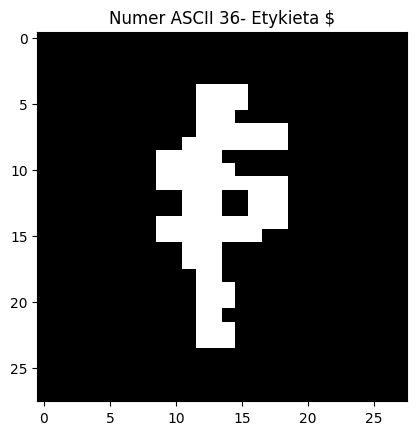

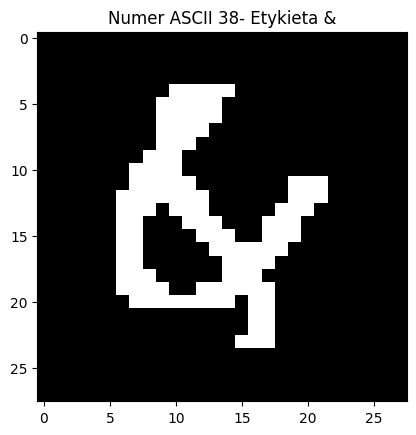

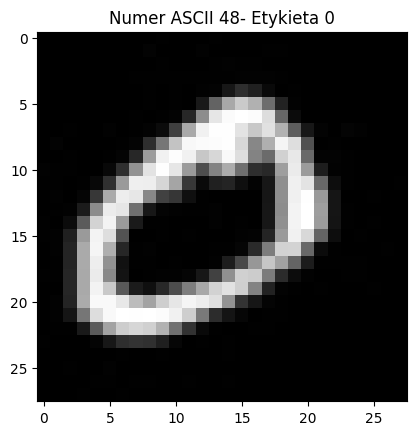

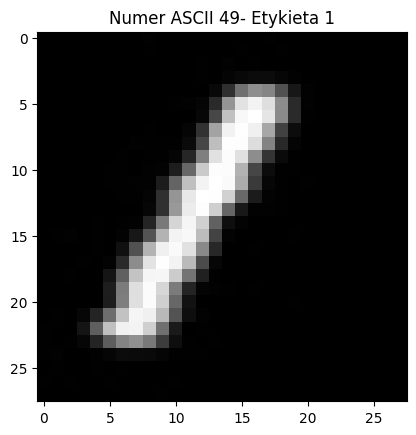

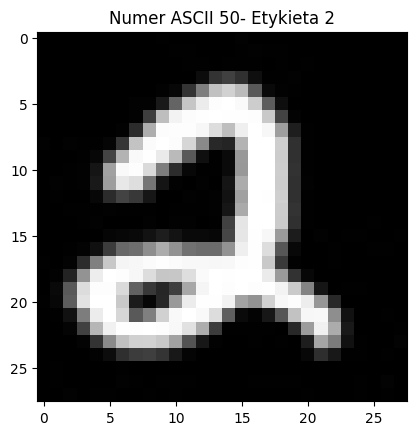

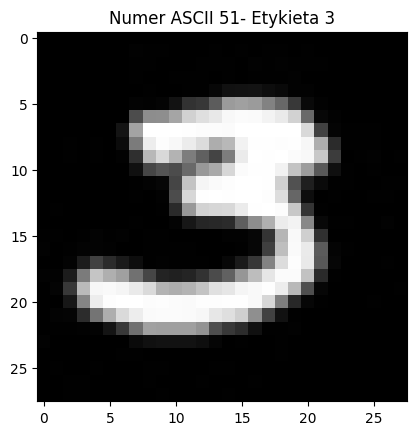

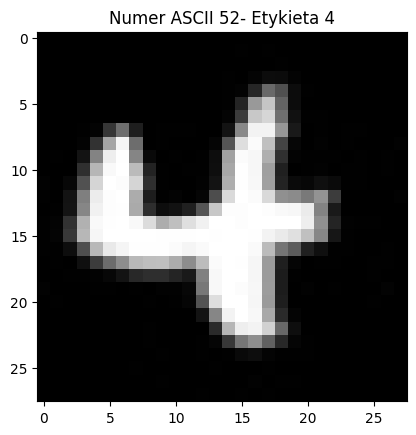

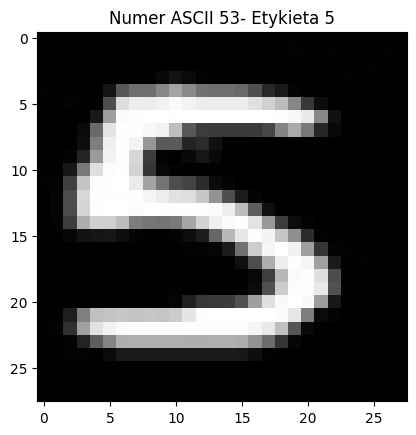

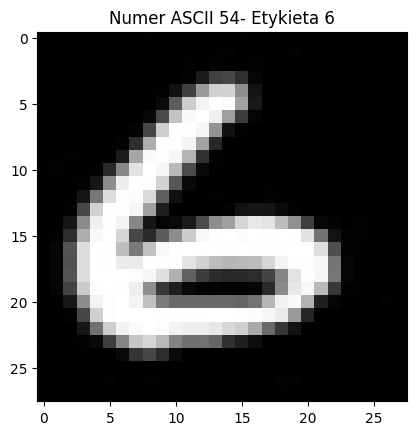

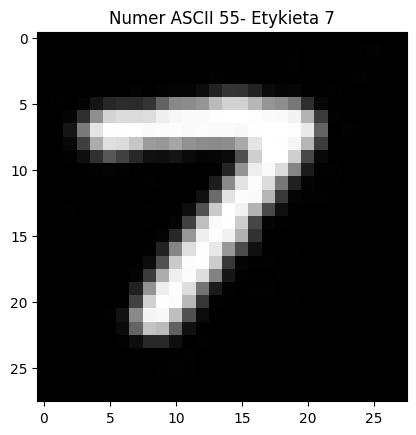

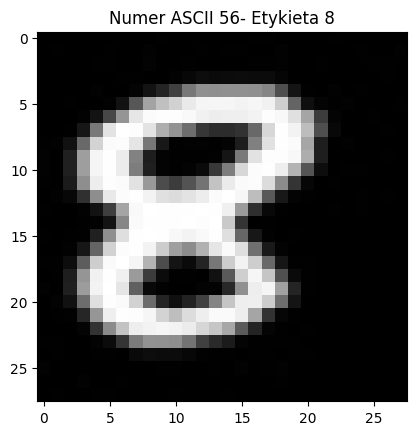

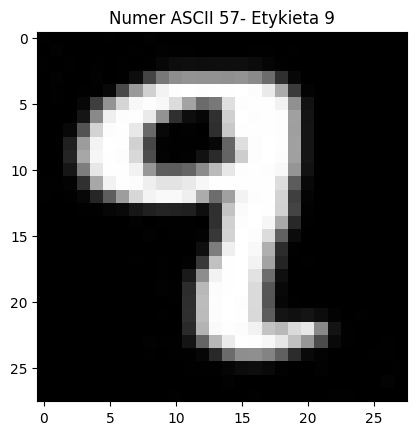

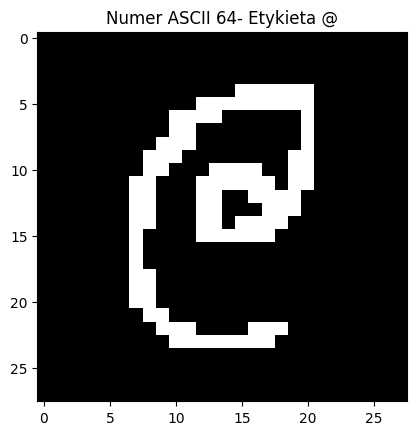

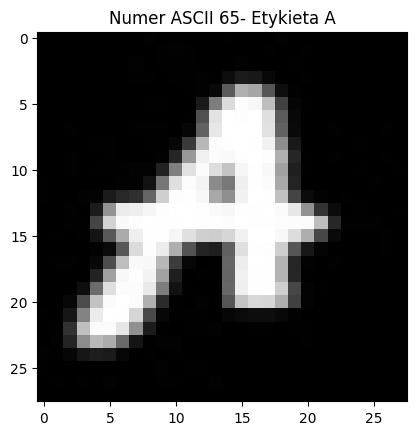

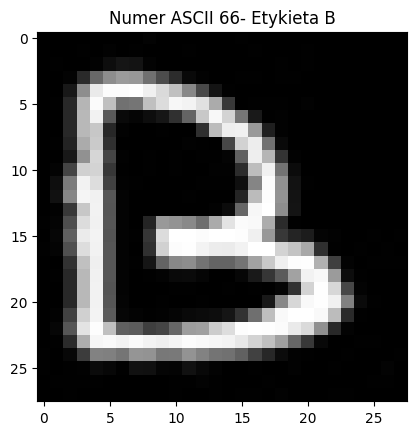

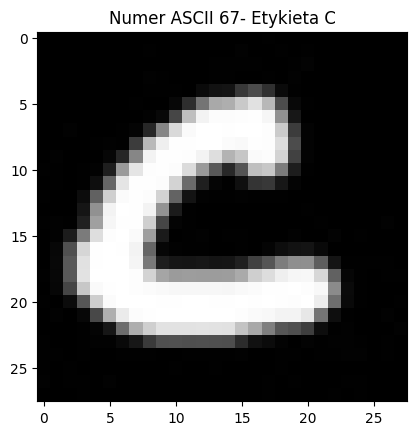

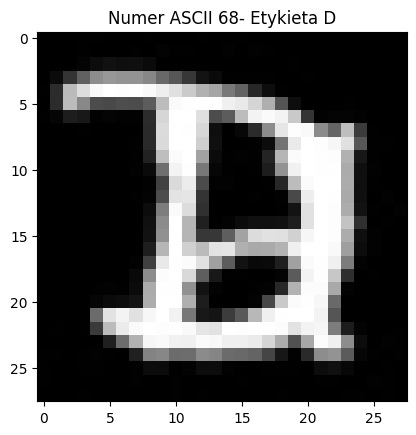

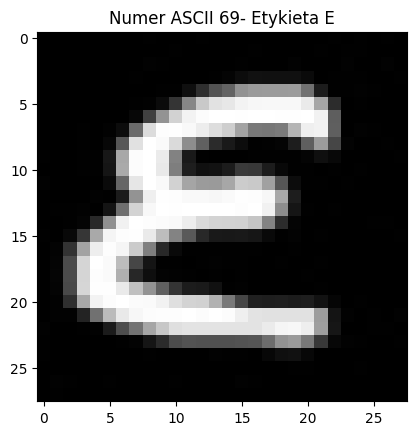

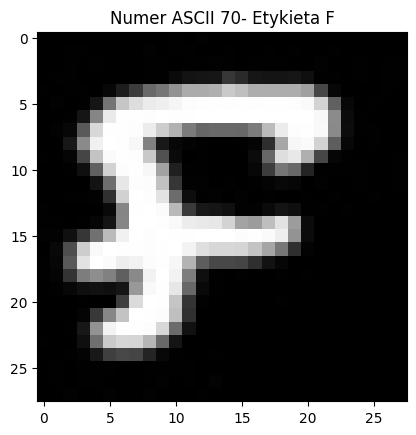

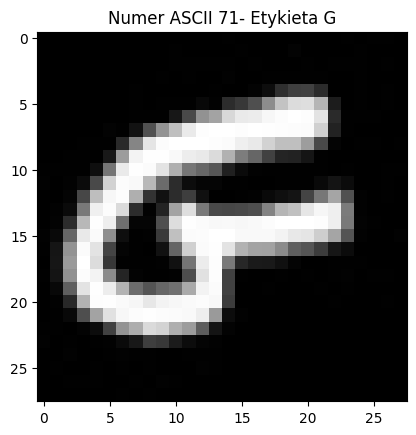

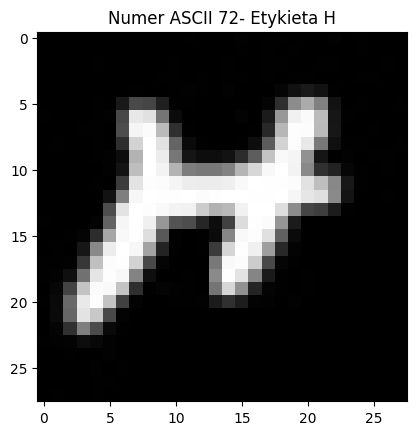

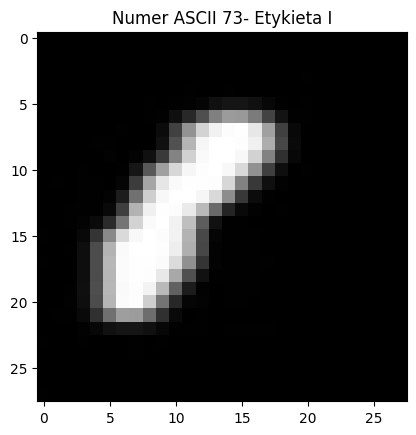

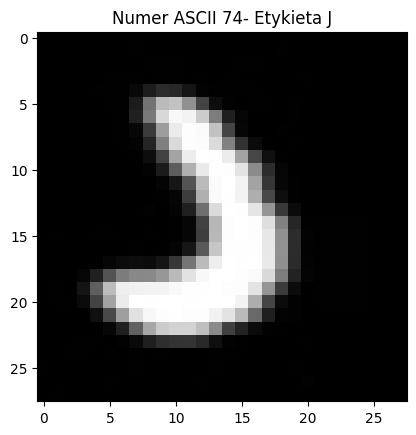

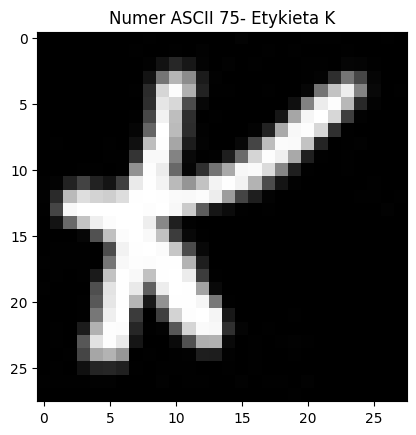

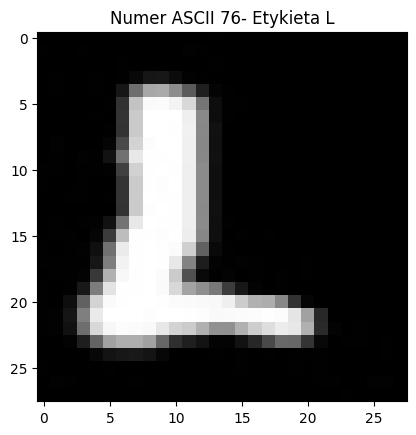

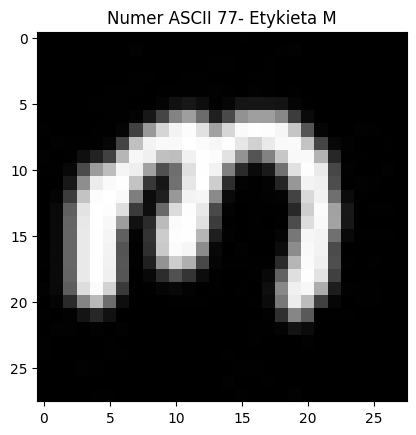

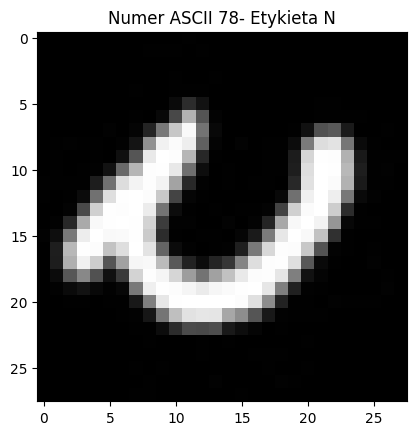

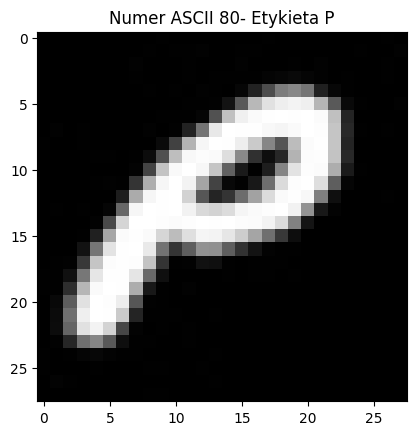

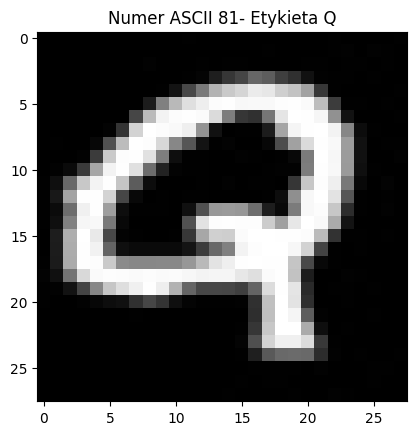

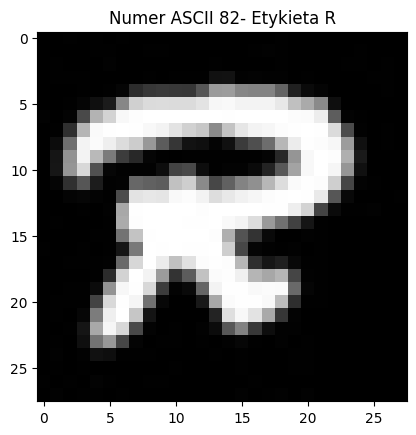

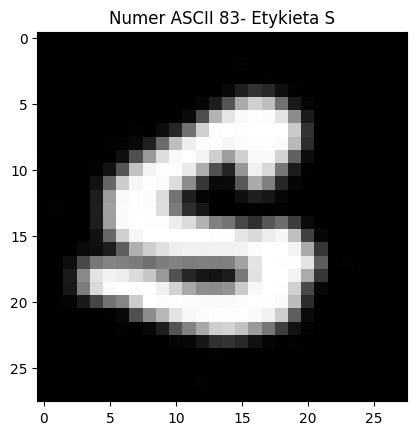

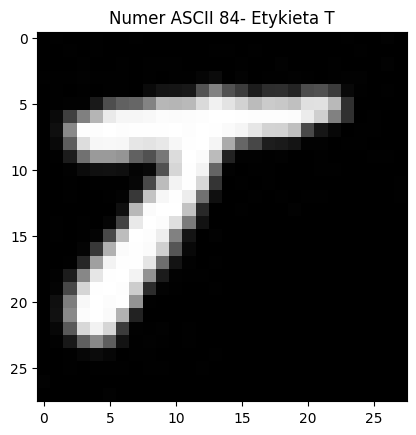

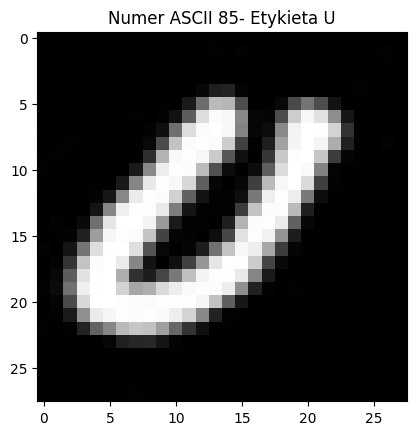

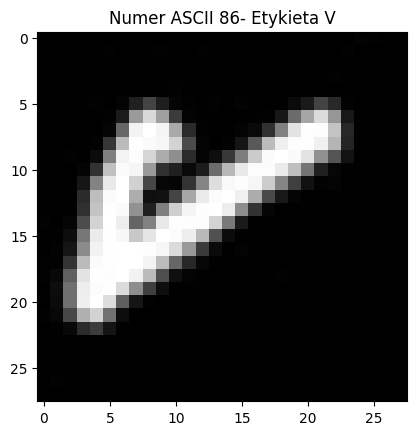

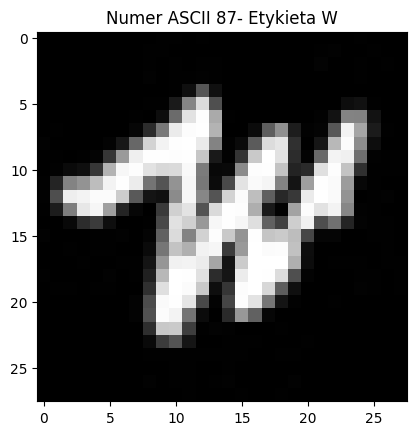

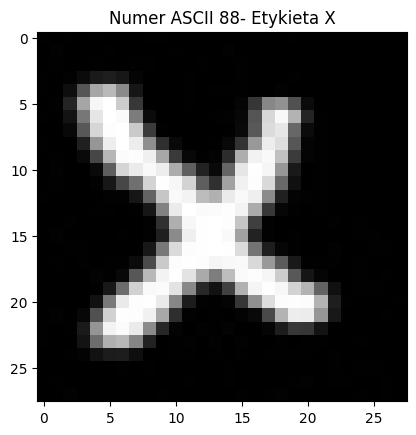

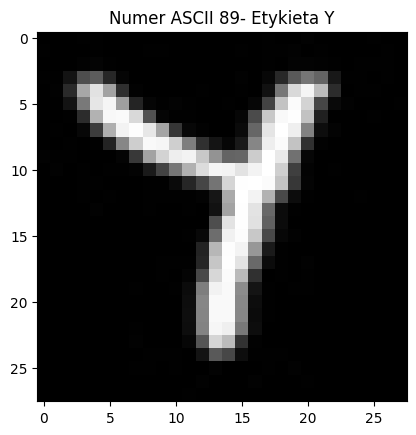

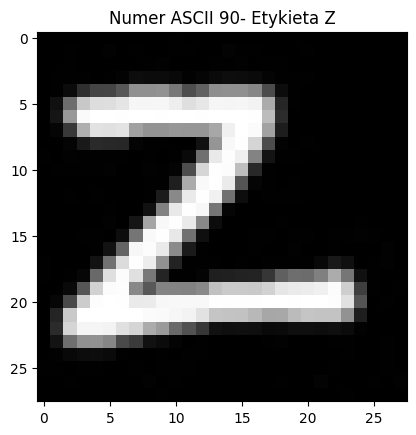

In [5]:
#Rozmiar danych
print("Rozmiar danych:", data.shape)
print("Rozmiar etykiet:", labels.shape)

#Sprawdzenie czy znaki ASCII zgadzają się z etykietami
unique_labels = np.unique(labels)

for label in unique_labels:
    print(f"Numer ASCII {label}- Etykieta {chr(label)}")

#Wyświetlanie po jednym przykładzie dla sprawdzenia
for label in unique_labels:
    index = np.where(labels == label)[0][0]
    example_image = data[index]

    plt.figure()
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Numer ASCII {label}- Etykieta {chr(label)}")
    plt.show()

In [7]:
flatten_data = data.flatten().reshape(856014, 784)

print(flatten_data.shape)

(856014, 784)


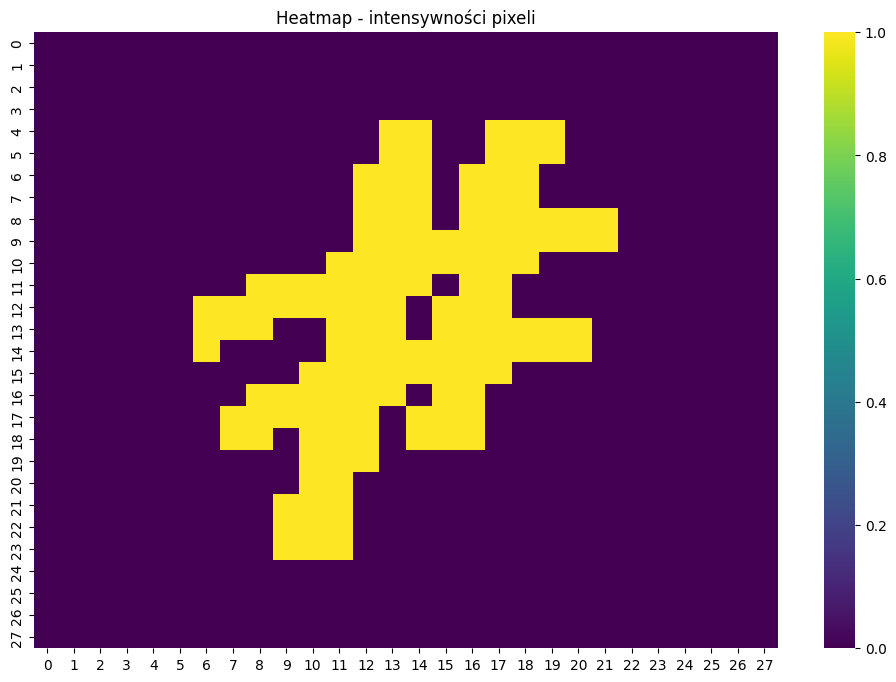

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[0], cmap='viridis')
plt.title('Heatmap - intensywności pixeli')
plt.show()

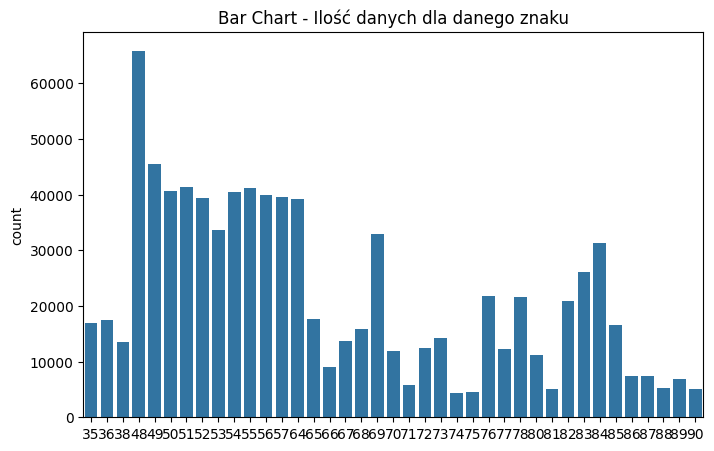

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x=labels)
plt.title('Bar Chart - Ilość danych dla danego znaku')
plt.show()